In [6]:
import joblib
import pandas as pd
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier

random_forest_model: RandomForestClassifier = joblib.load(
    "D:/CARRERA/TESIS/forest_explainer_tesis/datasets/Titanic/titanic.joblib")

df: pd.DataFrame = pd.read_csv("D:/CARRERA/TESIS/forest_explainer_tesis/datasets/Titanic/DataSet_Titanic.csv")


In [39]:
import shap

# Calcula los valores SHAP

explainer = shap.TreeExplainer(random_forest_model)

shap_values = explainer.shap_values(df.drop(columns="Sobreviviente"))


print(shap_values)

[[[ 7.68920544e-02 -7.68920544e-02]
  [ 1.24556758e-01 -1.24556758e-01]
  [ 7.19480123e-03 -7.19480123e-03]
  [-6.06248964e-03  6.06248964e-03]
  [ 1.49685762e-02 -1.49685762e-02]]

 [[-1.18263145e-01  1.18263145e-01]
  [-2.35739926e-01  2.35739926e-01]
  [ 6.68754419e-03 -6.68754419e-03]
  [-5.50360973e-03  5.50360973e-03]
  [ 1.04630453e-02 -1.04630453e-02]]

 [[ 9.97756435e-02 -9.97756435e-02]
  [-2.30878486e-01  2.30878486e-01]
  [ 4.05888508e-03 -4.05888508e-03]
  [-1.31222772e-03  1.31222772e-03]
  [ 1.12753715e-02 -1.12753715e-02]]

 ...

 [[-1.19031703e-01  1.19031703e-01]
  [-2.36996140e-01  2.36996140e-01]
  [ 1.85870347e-03 -1.85870347e-03]
  [-1.22386858e-03  1.22386858e-03]
  [ 1.06922108e-02 -1.06922108e-02]]

 [[-1.23904867e-01  1.23904867e-01]
  [ 1.37160122e-01 -1.37160122e-01]
  [ 5.10113773e-03 -5.10113773e-03]
  [ 2.72416868e-04 -2.72416868e-04]
  [ 1.46145809e-02 -1.46145809e-02]]

 [[ 7.79927004e-02 -7.79927004e-02]
  [ 1.25267350e-01 -1.25267350e-01]
  [ 1.046033

IndexError: index 613 is out of bounds for axis 0 with size 500

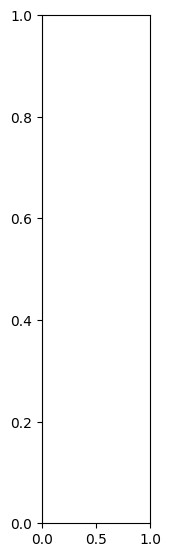

In [44]:
shap.summary_plot(shap_values, df.drop(columns="Sobreviviente")[:500], plot_type="bar")

In [27]:
shap_values_df = pd.DataFrame(shap_values.sum(axis=2).sum(axis=0), columns=random_forest_model.feature_names_in_)

ValueError: Shape of passed values is (5, 1), indices imply (5, 5)

In [29]:
fig = go.Figure(go.Bar(x=random_forest_model.feature_names_in_, y=shap_values.sum(axis=2).sum(axis=0)))

fig.update_layout(title="SHAP Importances", xaxis_title="Feature Names", yaxis_title="SHAP Importance")

fig.show()